Prepare data for plotting in R

In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [18]:
import pickle
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [48]:
matfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_weight.pkl'
labelfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_label.pkl'
dlabelfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_disease_label.pkl'
bandfile = '/Users/bogao/DataFiles/new landscape/data/bands.pkl'
with open(matfile, 'rb') as fmat, open(labelfile, 'rb') as flab, open(dlabelfile, 'rb') as fdl, open(bandfile, 'rb') as fbd:
    data = pickle.load(fmat)
    labels = pickle.load(flab)
    dlabels = pickle.load(fdl)
    bands = pickle.load(fbd)


In [13]:
data.shape

(42820, 1622)

### Data by type

#### Brain

In [14]:
dd = np.maximum(data,0)
dd = dd[labels == 'Brain']
dd_label = dlabels[labels == 'Brain']

dd = dd[dd_label != 'None']
dd_label = dd_label[dd_label != 'None']



In [26]:
dd_label = pd.Series(dd_label).str[:3].values

In [28]:
d938 = dd[dd_label == '938']
d944 = dd[dd_label == '944']
d940 = dd[dd_label == '940']
d945 = dd[dd_label == '945']
d939 = dd[dd_label == '939']
d947 = dd[dd_label == '947']

In [49]:
subd = [d938, d944, d940, d945, d939, d947]
subl = ['d938', 'd944', 'd940', 'd945', 'd939', 'd947']
for i in range(len(subd)):
    dsum = np.sum(subd[i], axis=0)/subd[i].shape[0]
    colname = subl[i] + '_dup'
    bands[colname] = dsum[:811]
    colname = subl[i] + '_del'
    bands[colname] = dsum[811:]


In [50]:
bands

,chro,start,end,name,note,chr,d938_dup,d938_del,d944_dup,d944_del,d940_dup,d940_del,d945_dup,d945_del,d939_dup,d939_del,d947_dup,d947_del
0,chr1,0,2300000,p36.33,gneg,1,0.000000,0.000370,0.000574,0.004133,0.000000,0.000000,0.002079,0.009180,0.000000,0.002507,0.000000,0.006254
1,chr1,123400000,125100000,q11,acen,1,0.115841,0.000000,0.208835,0.003324,0.126680,0.001832,0.054960,0.000540,0.405043,0.000000,0.142448,0.000000
2,chr1,125100000,143200000,q12,gvar,1,0.031077,0.000000,0.058832,0.000000,0.041991,0.000000,0.014727,0.000000,0.077083,0.000000,0.049422,0.000000
3,chr1,143200000,147500000,q21.1,gneg,1,0.000003,0.035498,0.002182,0.041088,0.000148,0.019633,0.001011,0.118502,0.000000,0.025886,0.000000,0.013897
4,chr1,147500000,150600000,q21.2,gpos50,1,0.000000,0.000000,0.000100,0.000439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,chr22,37200000,40600000,q13.1,gneg,22,0.000016,0.000000,0.000916,0.000248,0.001320,0.000344,0.000127,0.000000,0.000000,0.000000,0.022348,0.000000
807,chr22,40600000,43800000,q13.2,gpos50,22,0.000000,0.000000,0.001016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
808,chr22,43800000,48100000,q13.31,gneg,22,0.000435,0.030607,0.000417,0.061479,0.000202,0.040484,0.000000,0.018345,0.000000,0.149630,0.003764,0.033381
809,chr22,49100000,50818468,q13.33,gneg,22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
brain_sub = '/Users/bogao/DataFiles/new landscape/data/brain_sub.csv'
bands.to_csv(brain_sub, index=False)

In [19]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(dd)
tsne = TSNE(random_state=1234).fit_transform(pca_result)

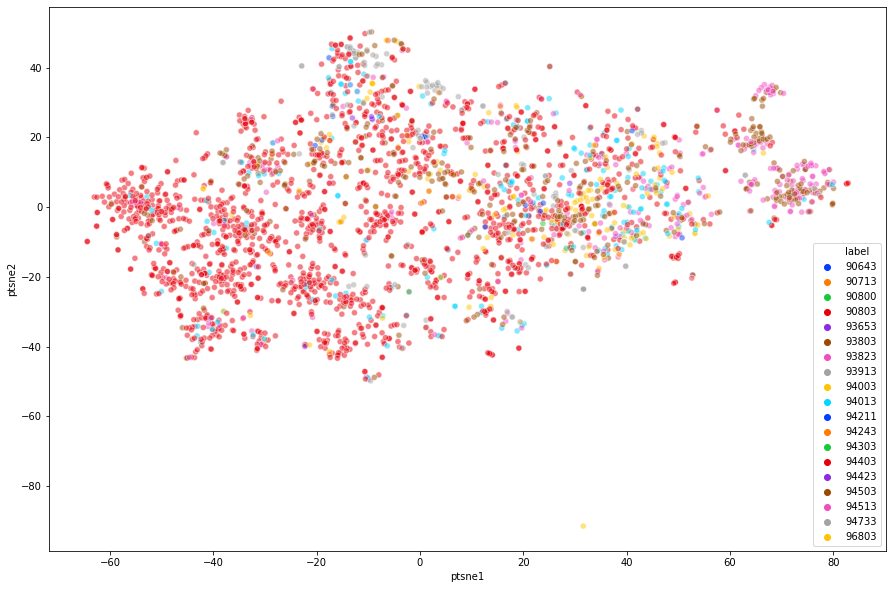

In [20]:
df = pd.DataFrame(tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dd_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dd_label))),
    data=df,
    legend="full",
    alpha=0.5
)